In [2]:
from inference import get_model
#from google.colab import userdata

ROBOFLOW_API_KEY = "ITfUpuY5QO9WTBpcEXTh"  # Replace with your actual Roboflow API key

GOAL_DETECTION_MODEL_ID = "football-goalpost/3"
GOAL_DETECTION_MODEL = get_model(model_id=GOAL_DETECTION_MODEL_ID, api_key=ROBOFLOW_API_KEY)

[04/10/25 08:26:59] WARNING  Your inference package version 0.43.0 is out of date! Please upgrade to ]8;id=737809;file://c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\inference\core\__init__.py\__init__.py]8;;\:]8;id=945705;file://c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\inference\core\__init__.py#41\41]8;;\
                             version 0.46.4 of inference for the latest features and bug fixes by                  
                             running `pip install --upgrade inference`.                                            

ModelDependencyMissing: Your `inference` configuration does not support PaliGemma model. Use pip install 'inference[transformers]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support Florence2 model. Use pip install 'inference[transformers]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support Qwen2.5-VL model. Use pip install 'inference[transformers]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[clip]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does

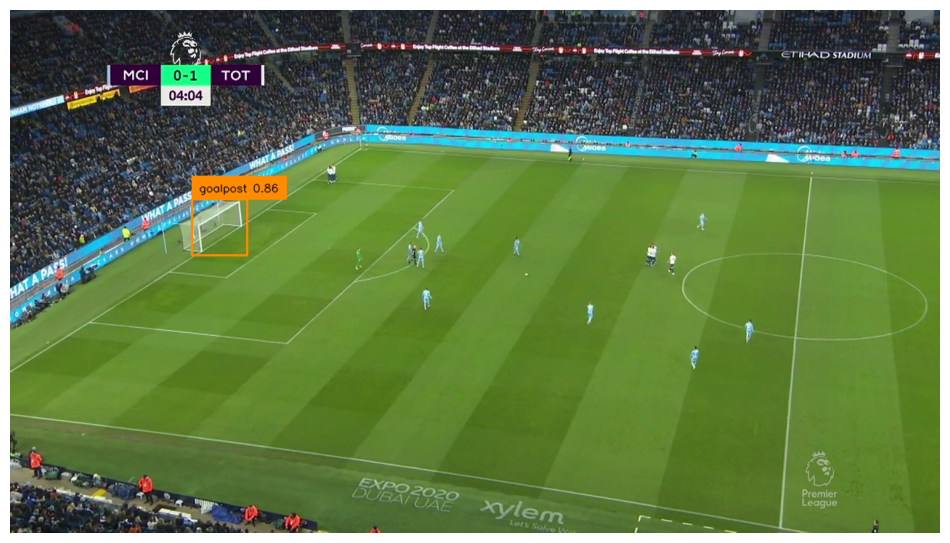

In [4]:
import supervision as sv
import numpy as np  

SOURCE_VIDEO_PATH = "C:/Users/user/Desktop/FootballAI/videos/goalMatch.mp4"

box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

frame_number = 2000  # Change to the desired frame number
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

for i, frame in enumerate(frame_generator):
    if i == frame_number:
        # Run inference on the specific frame
        result = GOAL_DETECTION_MODEL.infer(frame, confidence=0.5)[0]
        detections = sv.Detections.from_inference(result)

        label_annotator = sv.LabelAnnotator(##labeling the box and adding text
          color = sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
          text_color = sv.Color.from_hex('#000000')
           )
        # Annotate the frame
        annotated_frame = frame.copy()
        annotated_frame = box_annotator.annotate(
            scene=annotated_frame,
            detections=detections
          )

        labels = [
           f"{class_name} {confidence:.2f}"
          for class_name, confidence
          in zip(detections["class_name"] , detections.confidence)
           ]

        annotated_frame = label_annotator.annotate(annotated_frame , detections,labels =labels)##annotate the frame with the labels
 
        # Show the annotated frame
        sv.plot_image(annotated_frame)


In [7]:
from math import sqrt
# Function to calculate Euclidean distance
def calculate_distance(ball_center, goalpost_center):
    return sqrt((goalpost_center[0] - ball_center[0])**2 + (goalpost_center[1] - ball_center[1])**2)

In [11]:
goalpost_center = None  # Variable to store the center of the goalpost
frame = frame_generator.__next__()

result = GOAL_DETECTION_MODEL.infer(image, confidence=0.5)[0]

detections = sv.Detections.from_inference(result)
print(detections.xyxy)

for detection, class_id in zip(detections.xyxy, detections.class_id):
        x_min, y_min, x_max, y_max = detection
        goalpost_center = ((x_min + x_max) / 2, (y_min + y_max) / 2)  # Calculate the center of the goalpost
        print(f"Goalpost center: {goalpost_center}")  # Print the center coordinates
        break  # Stop after finding the first goalpost


[[116. 203. 212. 308.]]
Goalpost center: (164.0, 255.5)


In [ ]:
#Drwing a red circle on the goalpost center


In [ ]:
import cv2
import numpy as np
import supervision as sv
goalpost_center = None  # Variable to store the center of the goalpost

image_path = "C:/Users/user/Desktop/FootballAI/videos/image.png"  # Path to the image
image = cv2.imread(image_path)  # Load the image using OpenCV

result = GOAL_DETECTION_MODEL.infer(image, confidence=0.3)[0]

detections = sv.Detections.from_inference(result)
print(detections.class_id)

for detection, class_id in zip(detections.xyxy, detections.class_id):
    x_min, y_min, x_max, y_max = detection
    goalpost_center = ((x_min + x_max) / 2, (y_min + y_max) / 2)  # Calculate the center of the goalpost
    print(f"Goalpost center: {goalpost_center}")  # Print the center coordinates
    
    # Draw a red dotted circle at the center
    center_coordinates = (int(goalpost_center[0]), int(goalpost_center[1]))
    radius = 5
    color = (0, 0, 255)  # Red color in BGR
    thickness = 2
    line_type = cv2.LINE_AA  # Anti-aliased line for better quality
    cv2.circle(image, center_coordinates, radius, color, thickness, lineType=line_type)
    
    break  # Stop after finding the first goalpost

# Display the image with the red dotted circle
cv2.imshow("Image with Center Point", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


[0]
Goalpost center: (164.0, 255.5)
